In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [123]:
df = pd.read_csv('./data_prepared.csv')

In [124]:
import pickle
file = open("./skill_dictionary",'rb')
skills_dict = pickle.load(file)
file.close()

In [125]:
df.head()

,Job_position,Company,Location,requirements,posting_frequency,job_title,min_sal,max_sal,avg_yearly_sal,monthly_sal,...,unix,shell,jquery,iot,bootstrap,freelance,word,aws,git,ruby
0,na,Parakh Online Pvt Ltd,"New Delhi, Delhi",na,1.0,jr,500000.0,700000.0,600000.0,50000.000000,...,0,0,0,0,0,0,0,0,0,0
1,reactjs redux,Codingmart Technologies,"Bengaluru, Karnataka",javascript react,1.0,na,800000.0,800000.0,800000.0,66666.666667,...,0,0,0,0,0,0,0,0,0,0
2,sr,Atlanta Systems Pvt Ltd,"Delhi, Delhi",ux,1.0,senior,30000.0,40000.0,35000.0,2916.666667,...,0,0,0,0,0,0,0,0,0,0
3,na,Gorai Technology Solutions,"Bengaluru, Karnataka",rest,1.0,jr,151537.0,645829.0,398683.0,33223.583333,...,0,0,0,0,0,0,0,0,0,0
4,asp net,Hublit Lighting Private Limited,"Delhi, Delhi",c# debugging,1.0,na,600000.0,600000.0,600000.0,50000.000000,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df['requirements'].fillna('na', inplace=True)

<AxesSubplot:>

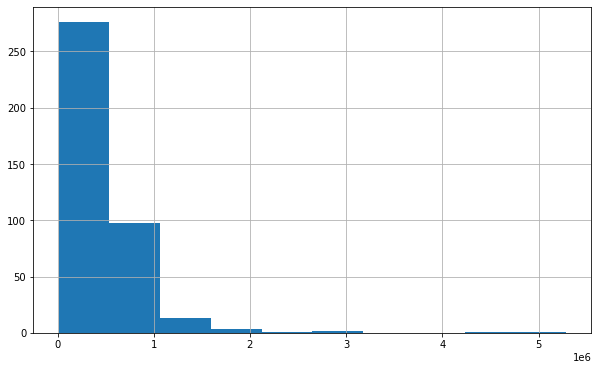

In [127]:
df.loc[(df['avg_yearly_sal'] != 0)]['avg_yearly_sal'].hist()

In [128]:
df.columns

Index(['Job_position', 'Company', 'Location', 'requirements',
       'posting_frequency', 'job_title', 'min_sal', 'max_sal',
       'avg_yearly_sal', 'monthly_sal', 'State', 'job_openings',
       'job_descr_len', 'redux', 'net', 'js', 'server', 'css', 'c', 'sql',
       'angular', 'java', 'stack', 'testing', 'javascript', 'python', 'c++',
       'ai', 'rest', 'api', 'app', 'react', 'nodejs', 'php', 'ui', 'database',
       'mvc', 'ux', 'senior', 'unity', 'html', 'mobile', 'mysql', 'flutter',
       'graphic', 'apis', 'azure', 'cloud', 'debugging', 'cs', 'food',
       'architecture', 'b2b', 'healthcare', 'security', 'pwas', 'version',
       'typescript', 'ios', 'rdbms', 'game', 'mongo', 'oops', 'restful',
       'financial', 'linux', 'unix', 'shell', 'jquery', 'iot', 'bootstrap',
       'freelance', 'word', 'aws', 'git', 'ruby'],
      dtype='object')

In [130]:
corr = df[['Job_position', 'Company', 'Location', 'requirements',
       'posting_frequency', 'avg_yearly_sal',
       'State', 'job_openings', 'job_descr_len']].corr()

<AxesSubplot:>

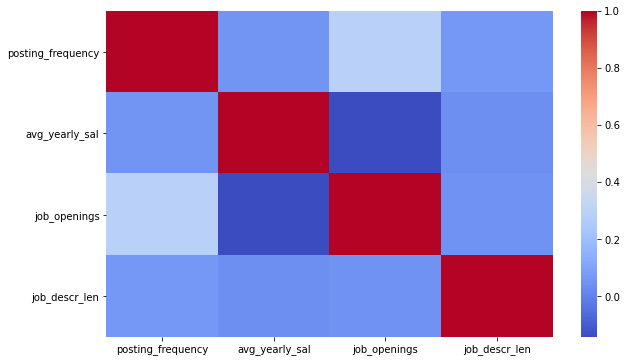

In [131]:
sns.heatmap(corr, cmap='coolwarm')

<b>Average year salary</b> and <b>job opening</b> are highly uncorrelated looks like companies offering higher annual packages come with fewer job opening as they may want to select only a handful of applicants <br>
There is also a slight correlation between posting <b>frequency</b> and <b>job openings</b>, companies with more job openings will have higher posting frequency as they would want to increase their reach to many applicants, <br>
most of other columns are weakly corelated 

In [132]:
cat_df = df.select_dtypes(include='object')

In [16]:
for i in cat_df.columns:
    cat = cat_df[i].value_counts()
    sns.barplot(x=cat.index, y=cat, data=cat_df)
    plt.xticks(rotation=90)
    plt.show()

KeyboardInterrupt: 

lets look at the states for job postings

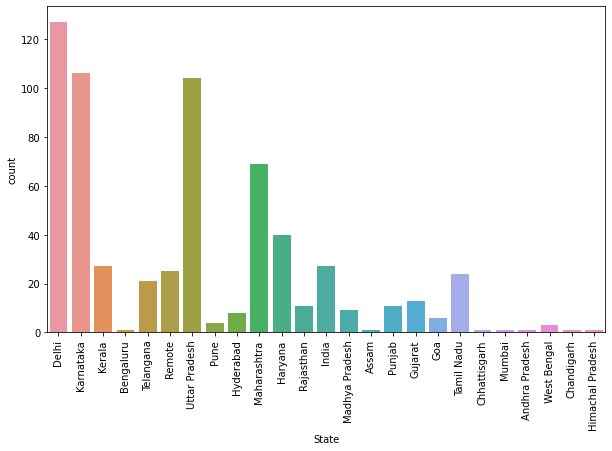

In [133]:
# Looks like Delhi has the most job openings for software developers
sns.countplot(x="State", data = df)
plt.xticks(rotation=90)
plt.show()

lets now look at the skill dictionary that we generated in feature engineering <br>
It contains the <b>frequency</b> of a particular skill occuring in <b>job description</b>

In [134]:
skill_df = pd.DataFrame.from_dict(skills_dict, orient='index', columns=['Frequency'])

top_skills = skill_df.sort_values(by='Frequency', ascending=False)[:10]
top_skills['skills'] = top_skills.index
top_skills.set_index(np.arange(0,len(top_skills)), inplace=True)

Now lets look at top 10 skills in demand by companies 

<AxesSubplot:xlabel='Frequency', ylabel='skills'>

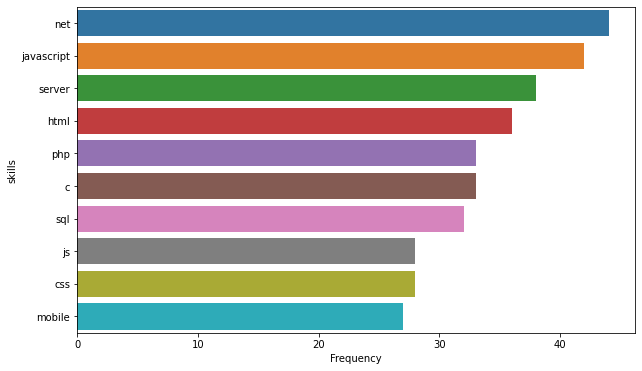

In [135]:
sns.barplot(x='Frequency', y='skills', data=top_skills)

Now lets look at all skills 

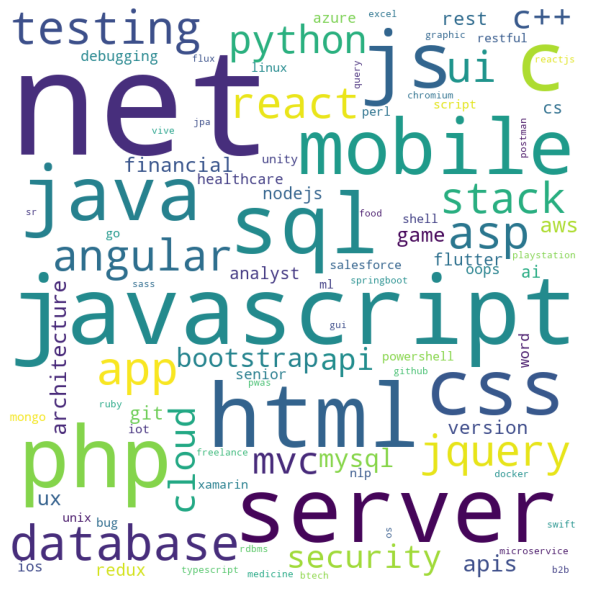

In [136]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(skills_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the wordcloud we can see some of the trending skills in software industry<br>
Looks like most jobs are for front end, most popular framework is .net and the most asked for programming language is javascript     

In [137]:
pd.pivot_table(df, index=['Company','State','requirements'], values='avg_yearly_sal')

avg_yearly_sal
Company                                           State          requirements                
404 DM                                            Tamil Nadu     na                  276000.0
88 Pictures Media & Entertainment Pvt Ltd         Mumbai         api python               0.0
A Prestigious client of Destiny HR Group Services Delhi          ios app                  0.0
                                                                 net c#                   0.0
A Square Technology                               Madhya Pradesh na                  360204.0
...                                                                                       ...
skilora                                           Remote         na                       0.0
surya marketing                                   Delhi          c# sql               90000.0
surya marketing MLM software developer            Delhi          sql                  90000.0
uCertify                                          Uttar Pradesh  na                  379000.0
www.bsslgroup.com                                 Uttar Pradesh  na                  360000.0

[603 rows x 1 columns]

In [138]:
pd.pivot_table(df, index=['State','requirements'], values='avg_yearly_sal', aggfunc='count').sort_values(by='avg_yearly_sal', ascending=True)[:20]

avg_yearly_sal
State          requirements                               
Delhi          php word                                  0
Karnataka      angular stack java rest api               0
Andhra Pradesh na                                        1
Maharashtra    java java mvc                             1
               jquery                                    1
               php                                       1
               php stack                                 1
               python js                                 1
               react redux nodejs                        1
               sql                                       1
               stack                                     1
               testing                                   1
               testing testing c# server                 1
Mumbai         api python                                1
Pune           ui sql                                    1
Punjab         c# c#                                     1
               cloud                                     1
               database database                         1
               senior                                    1
               stack python                              1

In [139]:
df.columns

Index(['Job_position', 'Company', 'Location', 'requirements',
       'posting_frequency', 'job_title', 'min_sal', 'max_sal',
       'avg_yearly_sal', 'monthly_sal', 'State', 'job_openings',
       'job_descr_len', 'redux', 'net', 'js', 'server', 'css', 'c', 'sql',
       'angular', 'java', 'stack', 'testing', 'javascript', 'python', 'c++',
       'ai', 'rest', 'api', 'app', 'react', 'nodejs', 'php', 'ui', 'database',
       'mvc', 'ux', 'senior', 'unity', 'html', 'mobile', 'mysql', 'flutter',
       'graphic', 'apis', 'azure', 'cloud', 'debugging', 'cs', 'food',
       'architecture', 'b2b', 'healthcare', 'security', 'pwas', 'version',
       'typescript', 'ios', 'rdbms', 'game', 'mongo', 'oops', 'restful',
       'financial', 'linux', 'unix', 'shell', 'jquery', 'iot', 'bootstrap',
       'freelance', 'word', 'aws', 'git', 'ruby'],
      dtype='object')

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='State'>

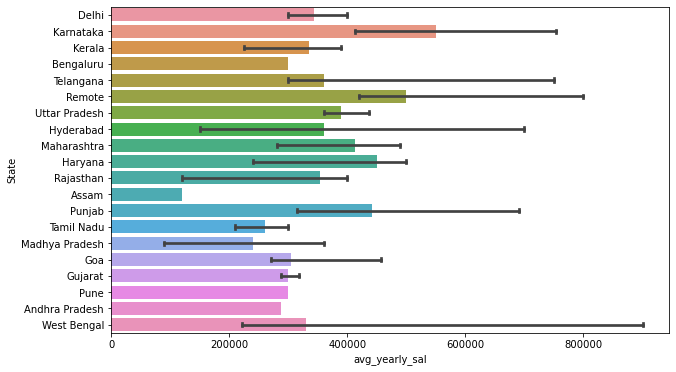

In [140]:
sns.barplot(x='avg_yearly_sal', y='State', data=df.loc[(df['avg_yearly_sal'] != 0)], estimator=np.median, capsize=.2) 

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='State'>

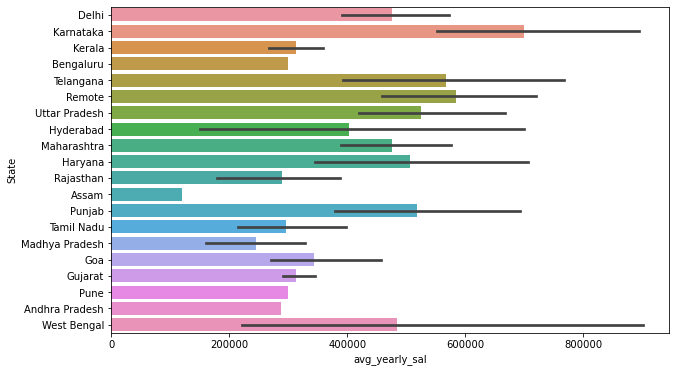

In [113]:
sns.barplot(x='avg_yearly_sal', y='State', data=df.loc[(df['avg_yearly_sal'] != 0)]) 

In [156]:
df_pivots = df[['redux', 'net', 'Job_position', 'job_title', 'Company',
       'js', 'server', 'css', 'c', 'sql', 'angular', 'java', 'stack',
       'testing', 'javascript', 'python', 'c++', 'ai', 'rest', 'api', 'app',
       'react', 'nodejs', 'php', 'ui', 'database', 'mvc', 'ux', 'senior',
       'unity', 'html', 'mobile', 'mysql', 'flutter', 'graphic', 'apis',
       'azure', 'cloud', 'debugging', 'cs', 'food', 'architecture', 'b2b',
       'healthcare', 'security', 'pwas', 'version', 'typescript', 'ios',
       'rdbms', 'game', 'mongo', 'oops', 'restful', 'financial', 'linux',
       'unix', 'shell', 'jquery', 'iot', 'bootstrap', 'freelance', 'word',
       'aws', 'git', 'ruby', 'avg_yearly_sal']]

In [162]:
for i in df_pivots.columns:
    if i != 'avg_yearly_sal':
        print(i)
        print(pd.pivot_table(df_pivots, index=i, values = 'avg_yearly_sal').sort_values(by = 'avg_yearly_sal', ascending=False))

redux
       avg_yearly_sal
redux                
1       443058.000000
0       309213.471698
net
     avg_yearly_sal
net                
0     310073.063694
1     282000.000000
Job_position
                         avg_yearly_sal
Job_position                           
stack nodejs docker sql      5285448.00
c# net                       2000000.00
senior net                   1141680.00
nodejs                        989699.00
flutter                       908648.25
...                                 ...
net reactjs                        0.00
mvc                                0.00
ml                                 0.00
senior c# net                      0.00
ai ml                              0.00

[79 rows x 1 columns]
job_title
           avg_yearly_sal
job_title                
senior      365823.702703
na          319364.277580
jr          116094.435897
Company
                                   avg_yearly_sal
Company                                          
Jobsrefer         